## Naive Bayes classification
This is an example

In [1]:
# load the data
import pandas as pd

# clean the data
import numpy as np
from collections import Counter

# baseline classifier
from sklearn.dummy import DummyClassifier
# naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

# for converting training and test datasets into matrices
# TfidfVectorizer does this specifically for documents
from sklearn.feature_extraction.text import TfidfVectorizer

# for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

# for evaluating the quality of the classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# the training data (final set 13,520 instances))
df_f = pd.read_csv('a2a_train_final.tsv', sep = '\t', header=None, names=['Annotation', 'Comment'])
df_f.head(20)

,Annotation,Comment
0,1/1,... people who have NEVER voted... sneaky way ...
1,0/0,Being a member of the European Union is a bit ...
2,0/0,Brexit is bad. Immigrants make Britain great. ...
3,0/0,Britain is basically Pompeii if the Pompeii ha...
4,1/1,Britain's exit is a huge blow to the dream of ...
5,1/-1,"Bye, Bye EU, Bye, Bye...Fireworks are going of..."
6,0/-1,Could make prices up? Of course it will! Get r...
7,1/1,"Death to the EU, Death to the EU!"
8,1/1,Europe Union 'lost' Britain. is more accurate....
9,1,European Union after 47 years of membership - ...


In [3]:
X = df_f["Comment"]
X.head()

0    ... people who have NEVER voted... sneaky way ...
1    Being a member of the European Union is a bit ...
2    Brexit is bad. Immigrants make Britain great. ...
3    Britain is basically Pompeii if the Pompeii ha...
4    Britain's exit is a huge blow to the dream of ...
Name: Comment, dtype: object

In [4]:
score = df_f["Annotation"]
Y = []
for sc in score:
    Y.append(sc.split("/")[0])
    
Y[:10]

['1', '0', '0', '0', '1', '1', '0', '1', '1', '1']

In [5]:
X_train, X_eval, Y_train, Y_eval = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    random_state=12345)
dv1 = TfidfVectorizer()
X_train_trans = dv1.fit_transform(X_train)
X_eval_trans = dv1.transform(X_eval)

In [6]:
def train_dummy(X, Y, X_eval_trans):
    clf = DummyClassifier()
    clf.fit(X,Y)
    training_score = clf.score(X, Y)
    dummy_pred = clf.predict(X_eval_trans)
    return training_score, dummy_pred

In [7]:
def train_NB(X, Y, X_eval_trans):
    clf = MultinomialNB()
    clf.fit(X,Y)
    training_score = clf.score(X, Y)
    nb_pred = clf.predict(X_eval_trans)
    return training_score, nb_pred

In [8]:
print("Training scores: ")
dummy_training_score, dummy_pred = train_dummy(X_train_trans,Y_train, X_eval_trans)
print("Dummy training score is " + str(dummy_training_score))
NB_training_score, NB_pred = train_NB(X_train_trans,Y_train, X_eval_trans)
print("Naive Bayes training score is " + str(NB_training_score))

Training scores: 
Dummy training score is 0.500601128271525
Naive Bayes training score is 0.8740405067973736


In [9]:
print("Accuracy scores: ")
    
dummy_acc = accuracy_score(Y_eval, dummy_pred)
NB_acc = accuracy_score(Y_eval, NB_pred)
print('     |  true  |  false ')
print('----------------------')
print('dummy| {:.4f} | {:.4f}'.format(dummy_acc, (1-dummy_acc)))
print('  NB | {:.4f} | {:.4f}'.format(NB_acc, (1-NB_acc)))

Accuracy scores: 
     |  true  |  false 
----------------------
dummy| 0.5111 | 0.4889
  NB | 0.7530 | 0.2470


In [10]:
print("Confusion matrix: ")
print("Naive Bayes: ")
print(confusion_matrix(Y_eval, NB_pred))

Confusion matrix: 
Naive Bayes: 
[[ 937  394]
 [ 274 1099]]


## Regression

In [11]:
def success(p_success):
    return np.random.binomial(1,p_success)

In [24]:
def makeVillager():
    woman = success(0.6) # 1 is true, 0 is false
    if woman == True:
        meanHeight = 195
        sdHeight = 10
        meanWeight = 70
        sdWeight = 5
    else:
        meanHeight = 140
        sdHeight = 15
        meanWeight = 90
        sdWeight = 10

    height = np.random.normal(meanHeight, sdHeight)
    weight = np.random.normal(meanWeight, sdWeight)

    return [height, weight, woman]

       height     weight  gender
0  158.175652  90.063883       0
1  202.714946  76.847366       1
2  187.075634  78.884596       1
3  215.148727  71.443376       1
4   97.717713  99.861054       0


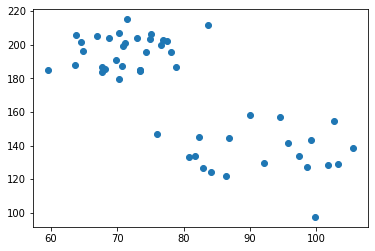

In [25]:
village = pd.DataFrame([makeVillager() for _ in range(50)], columns=["height", "weight", "gender"])
print(village.head())
plt.scatter(village.weight, village.height)
plt.show()

In [26]:
village.insert(2, "Intercept", 1, True)
village.head()

,height,weight,Intercept,gender
0,158.175652,90.063883,1,0
1,202.714946,76.847366,1,1
2,187.075634,78.884596,1,1
3,215.148727,71.443376,1,1
4,97.717713,99.861054,1,0


In [27]:
Xp  = village[["Intercept","height"]].to_numpy()
Yp  = village["weight"].to_numpy()
Xpt = Xp.transpose()

In [28]:
Xpt[:2,:5]

array([[  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ],
       [158.17565246, 202.7149456 , 187.07563413, 215.14872685,
         97.71771285]])

In [29]:
Yp[:5]

array([90.06388289, 76.84736615, 78.88459617, 71.44337613, 99.86105388])

In [30]:
a = np.matmul(np.linalg.inv(np.matmul(Xpt,Xp)),np.matmul(Xpt,Yp))
a

array([130.67715686,  -0.29668572])

In [31]:
pred_y = []
for r in Xp:
    pred_y.append(a.dot(r))   

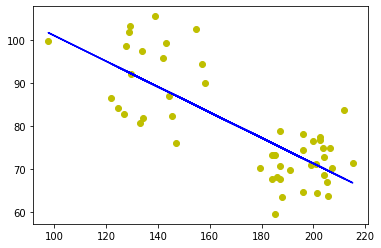

In [32]:
plt.plot(village["height"],village["weight"],"yo")
plt.plot(village["height"],pred_y, "b-")

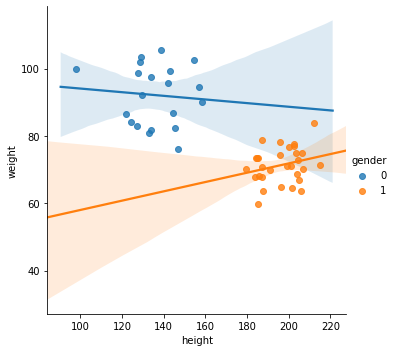

In [33]:
sns.lmplot(x='height', y='weight', data=village, hue='gender');

In [ ]:
[2, 0.5, -1] * [1, 1, 1] -> 2+0.5-1= 1.5
[2, 0.5, -1] * [1, 2, 4] -> 2+1-4 = -1
[2, 0.5, -1] * [1, 4, 16]
[2, 0.5, -1] * [1, 6, 36]

